<a href="https://colab.research.google.com/github/Keita062/soccer/blob/main/(10.29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 読み込むCSVファイルのパスをリスト化
file_paths = [
    "/content/1992.csv", "/content/1993.csv", "/content/1994.csv", "/content/1995.csv",
    "/content/1996.csv", "/content/1997.csv", "/content/1998.csv", "/content/1999.csv",
    "/content/2000.csv", "/content/2001.csv", "/content/2002.csv", "/content/2003.csv",
    "/content/2004.csv", "/content/2005.csv", "/content/2006.csv", "/content/2007.csv",
    "/content/2008.csv", "/content/2009.csv", "/content/2010.csv", "/content/2011.csv",
    "/content/2012.csv", "/content/2013.csv", "/content/2014.csv", "/content/2015.csv",
    "/content/2017.csv", "/content/2018.csv", "/content/2019.csv", "/content/2020.csv"
]

# 各CSVファイルをDataFrameとして読み込み、リストに格納
data_frames = [pd.read_csv(file) for file in file_paths]

# すべてのDataFrameを縦方向に結合
total_premia_data  = pd.concat(data_frames, ignore_index=True)

# 元のチーム名の配列
teams = np.array([
    'Manchester United FC', 'Arsenal FC', 'Chelsea FC', 'Liverpool FC',
    'Tottenham Hotspur FC', 'Everton FC', 'Manchester City FC',
    'Newcastle United FC', 'Aston Villa FC', 'West Ham United FC',
    'Blackburn Rovers FC', 'Southampton FC', 'Leeds United FC',
    'Middlesbrough FC', 'Leicester City FC', 'Fulham FC',
    'Sunderland AFC', 'Bolton Wanderers FC', 'Crystal Palace FC',
    'West Bromwich Albion FC', 'Stoke City FC', 'Coventry City FC',
    'Sheffield Wednesday FC', 'Wimbledon FC', 'Norwich City FC',
    'Charlton Athletic FC', 'Wigan Athletic FC',
    'Queens Park Rangers FC', 'Portsmouth FC', 'Birmingham City FC',
    'Derby County FC', 'Swansea City FC', 'Wolverhampton Wanderers FC',
    'Nottingham Forest FC', 'Ipswich Town FC', 'Watford FC',
    'Burnley FC', 'Sheffield United FC', 'AFC Bournemouth',
    'Hull City AFC', 'Reading FC', 'Brighton & Hove Albion FC',
    'Oldham Athletic AFC', 'Cardiff City FC', 'Bradford City AFC',
    'Huddersfield Town AFC', 'Blackpool FC', 'Tottenham', 'West Brom',
    'West Ham', 'Southampton', 'Liverpool', 'Sheffield Utd',
    'Newcastle Utd', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
    'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
    'Leicester City', 'Arsenal', 'Manchester City', 'Manchester Utd',
    'Wolves', 'Barnsley FC', 'Swindon Town FC'
])

# チーム名の標準化を行う辞書
team_name_mapping = {
    'Manchester United FC': 'Manchester United',
    'Manchester Utd': 'Manchester United',
    'Arsenal FC': 'Arsenal',
    'Arsenal': 'Arsenal',
    'Chelsea FC': 'Chelsea',
    'Chelsea': 'Chelsea',
    'Liverpool FC': 'Liverpool',
    'Liverpool': 'Liverpool',
    'Tottenham Hotspur FC': 'Tottenham Hotspur',
    'Tottenham': 'Tottenham Hotspur',
    'Everton FC': 'Everton',
    'Everton': 'Everton',
    'Manchester City FC': 'Manchester City',
    'Manchester City': 'Manchester City',
    'Newcastle United FC': 'Newcastle United',
    'Newcastle Utd': 'Newcastle United',
    'Aston Villa FC': 'Aston Villa',
    'Aston Villa': 'Aston Villa',
    'West Ham United FC': 'West Ham United',
    'West Ham': 'West Ham United',
    'Southampton FC': 'Southampton',
    'Southampton': 'Southampton',
    'Fulham FC': 'Fulham',
    'Fulham': 'Fulham',
    'Leeds United FC': 'Leeds United',
    'Leeds United': 'Leeds United',
    'Leicester City FC': 'Leicester City',
    'Leicester City': 'Leicester City',
    'Brighton & Hove Albion FC': 'Brighton',
    'Brighton': 'Brighton',
    'Burnley FC': 'Burnley',
    'Burnley': 'Burnley',
    'Wolverhampton Wanderers FC': 'Wolves',
    'Wolves': 'Wolves',
    # 追加のチーム名のマッピングをここに追加できます
}

# チーム名を標準化する
standardized_teams = np.array([team_name_mapping.get(team, team) for team in teams])

total_premia_data['Team 1'] = total_premia_data['Team 1'].map(team_name_mapping).fillna(total_premia_data['Team 1'])
total_premia_data['Team 2'] = total_premia_data['Team 2'].map(team_name_mapping).fillna(total_premia_data['Team 2'])

# Date列を曜日, 月, 日, 年に分割 (例: 'Sat Oct 14 2020')
total_premia_data[['Weekday', 'Month', 'Day', 'Year']] = total_premia_data['Date'].str.split(' ', expand=True)

# Day列を整数型に変換
total_premia_data['Day'] = pd.to_numeric(total_premia_data['Day'], errors='coerce')

In [27]:
total_premia_data['FT'] = total_premia_data['FT'].str.replace('–', '-', regex=False)
# スコア列を分割 (例: '2-4' → 'Team1_Score' と 'Team2_Score')
total_premia_data[['Team1_Score', 'Team2_Score']] = total_premia_data['FT'].str.split('-', expand=True)

# スコア列を整数型に変換
total_premia_data['Team1_Score'] = pd.to_numeric(total_premia_data['Team1_Score'], errors='coerce')
total_premia_data['Team2_Score'] = pd.to_numeric(total_premia_data['Team2_Score'], errors='coerce')

In [28]:
total_premia_data['Date_Formatted'] = pd.to_datetime(
    total_premia_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce'
)
total_premia_data.head()

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score,Date_Formatted
0,1,Sat Aug 15 1992,Arsenal,2-4,Norwich City FC,Sat,Aug,15,1992,2,4,1992-08-15
1,1,Sat Aug 15 1992,Leeds United,2-1,Wimbledon FC,Sat,Aug,15,1992,2,1,1992-08-15
2,1,Sat Aug 15 1992,Coventry City FC,2-1,Middlesbrough FC,Sat,Aug,15,1992,2,1,1992-08-15
3,1,Sat Aug 15 1992,Ipswich Town FC,1-1,Aston Villa,Sat,Aug,15,1992,1,1,1992-08-15
4,1,Sat Aug 15 1992,Crystal Palace FC,3-3,Blackburn Rovers FC,Sat,Aug,15,1992,3,3,1992-08-15


In [29]:
total_premia_data.isna().sum() # 欠損値の確認

,0
Round,0
Date,0
Team 1,0
FT,0
Team 2,0
Weekday,0
Month,0
Day,0
Year,0
Team1_Score,0


In [32]:
# スコアのカラムを整数型に変換
total_premia_data['Team1_Score'] = total_premia_data['Team1_Score'].astype(int)
total_premia_data['Team2_Score'] = total_premia_data['Team2_Score'].astype(int)

# 3. シーズンごとに勝ち数、引き分け数、負け数を集計する関数
def calculate_team_stats_per_season(df):
    season_stats = []

    # データ内のすべてのチームを取得
    teams = pd.concat([df['Team 1'], df['Team 2']]).unique()

    # 各年・各チームごとに成績を集計
    for year in df['Year'].unique():
        for team in teams:
            # チームが参加した試合を抽出
            season_data = df[
                (df['Year'] == year) &
                ((df['Team 1'] == team) | (df['Team 2'] == team))
            ]

            # 勝利数の計算（ホームとアウェイ両方）
            wins = len(pd.concat([
                season_data[(season_data['Team 1'] == team) & (season_data['Team1_Score'] > season_data['Team2_Score'])],
                season_data[(season_data['Team 2'] == team) & (season_data['Team2_Score'] > season_data['Team1_Score'])]
            ]))

            # 引き分け数
            draws = len(season_data[season_data['Team1_Score'] == season_data['Team2_Score']])

            # 敗北数（総試合数から勝ち・引き分けを引く）
            losses = len(season_data) - wins - draws

            # 得点の合計
            goals_scored = (
                season_data[season_data['Team 1'] == team]['Team1_Score'].sum() +
                season_data[season_data['Team 2'] == team]['Team2_Score'].sum()
            )

            # 失点の合計
            goals_conceded = (
                season_data[season_data['Team 1'] == team]['Team2_Score'].sum() +
                season_data[season_data['Team 2'] == team]['Team1_Score'].sum()
            )

            # 総試合数、勝率、ピタゴラス勝率を計算
            matches = wins + draws + losses
            win_rate = wins / matches if matches > 0 else 0
            pythagorean_win = (
                goals_scored**2 / (goals_scored**2 + goals_conceded**2)
                if (goals_scored + goals_conceded) > 0 else 0
            )

            # 集計結果をリストに追加
            season_stats.append({
                'Year': year,
                'Team': team,
                'Matches': matches,
                'Wins': wins,
                'Draws': draws,
                'Losses': losses,
                'Win_Rate': win_rate,
                'Pythagorean_Win_Percentage': pythagorean_win
            })

    return pd.DataFrame(season_stats)

# 4. データ集計の実行
seasonal_stats_df = calculate_team_stats_per_season(total_premia_data)

# 5. 勝率とピタゴラス勝率の推移をチーム別に確認
win_rate_trend = seasonal_stats_df.pivot(index='Year', columns='Team', values='Win_Rate')
pythagorean_trend = seasonal_stats_df.pivot(index='Year', columns='Team', values='Pythagorean_Win_Percentage')

In [33]:
# 6. 結果を表示
print("勝率の推移:")
win_rate_trend

勝率の推移:


Team,AFC Bournemouth,Arsenal,Aston Villa,Barnsley FC,Birmingham City FC,Blackburn Rovers FC,Blackpool FC,Bolton Wanderers FC,Bradford City AFC,Brighton,...,Swansea City FC,Swindon Town FC,Tottenham Hotspur,Watford FC,West Brom,West Bromwich Albion FC,West Ham United,Wigan Athletic FC,Wimbledon FC,Wolves
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.000000,0.409091,0.454545,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.318182,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000
1993,0.000000,0.395349,0.476190,0.000000,0.000000,0.523810,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.086957,0.372093,0.000000,0.000000,0.000000,0.347826,0.000000,0.404762,0.000000
1994,0.000000,0.341463,0.238095,0.000000,0.000000,0.682927,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.157895,0.317073,0.000000,0.000000,0.000000,0.292683,0.000000,0.452381,0.000000
1995,0.000000,0.365854,0.410256,0.000000,0.000000,0.500000,0.000000,0.095238,0.000000,0.000000,...,0.000000,0.000000,0.390244,0.000000,0.000000,0.000000,0.307692,0.000000,0.292683,0.000000
1996,0.000000,0.486486,0.487179,0.000000,0.000000,0.333333,0.000000,0.352941,0.000000,0.000000,...,0.000000,0.000000,0.405405,0.000000,0.000000,0.000000,0.342105,0.000000,0.444444,0.000000
1997,0.000000,0.473684,0.358974,0.238095,0.000000,0.425000,0.000000,0.190476,0.000000,0.000000,...,0.000000,0.000000,0.256410,0.000000,0.000000,0.000000,0.375000,0.000000,0.256410,0.000000
1998,0.000000,0.605263,0.567568,0.294118,0.000000,0.243243,0.000000,0.294118,0.000000,0.000000,...,0.000000,0.000000,0.351351,0.000000,0.000000,0.000000,0.405405,0.000000,0.315789,0.000000
1999,0.000000,0.657895,0.289474,0.000000,0.000000,0.166667,0.000000,0.000000,0.210526,0.000000,...,0.000000,0.000000,0.351351,0.200000,0.000000,0.000000,0.378378,0.000000,0.157895,0.000000
2000,0.000000,0.538462,0.405405,0.000000,0.000000,0.000000,0.000000,0.000000,0.179487,0.000000,...,0.000000,0.000000,0.325000,0.111111,0.000000,0.000000,0.384615,0.000000,0.166667,0.000000


In [34]:
print("\nピタゴラス勝率の推移:")
pythagorean_trend


ピタゴラス勝率の推移:


Team,AFC Bournemouth,Arsenal,Aston Villa,Barnsley FC,Birmingham City FC,Blackburn Rovers FC,Blackpool FC,Bolton Wanderers FC,Bradford City AFC,Brighton,...,Swansea City FC,Swindon Town FC,Tottenham Hotspur,Watford FC,West Brom,West Bromwich Albion FC,West Ham United,Wigan Athletic FC,Wimbledon FC,Wolves
Year,,,,,,,,,,,,,,,,,,,,,
1992,0.000000,0.522211,0.640000,0.000000,0.000000,0.742931,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.399011,0.000000,0.000000,0.000000,0.000000,0.000000,0.383003,0.000000
1993,0.000000,0.697155,0.619138,0.000000,0.000000,0.685765,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.162198,0.528961,0.000000,0.000000,0.000000,0.322321,0.000000,0.537682,0.000000
1994,0.000000,0.628253,0.388225,0.000000,0.000000,0.836838,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.200000,0.451726,0.000000,0.000000,0.000000,0.429645,0.000000,0.474376,0.000000
1995,0.000000,0.623077,0.624447,0.000000,0.000000,0.658221,0.000000,0.184090,0.000000,0.000000,...,0.000000,0.000000,0.599010,0.000000,0.000000,0.000000,0.439004,0.000000,0.346754,0.000000
1996,0.000000,0.744248,0.673395,0.000000,0.000000,0.522716,0.000000,0.293902,0.000000,0.000000,...,0.000000,0.000000,0.522716,0.000000,0.000000,0.000000,0.399900,0.000000,0.562813,0.000000
1997,0.000000,0.746114,0.511763,0.121877,0.000000,0.692308,0.000000,0.248966,0.000000,0.000000,...,0.000000,0.000000,0.304253,0.000000,0.000000,0.000000,0.442499,0.000000,0.382616,0.000000
1998,0.000000,0.872764,0.642796,0.252140,0.000000,0.304078,0.000000,0.381703,0.000000,0.000000,...,0.000000,0.000000,0.539155,0.000000,0.000000,0.000000,0.539936,0.000000,0.354296,0.000000
1999,0.000000,0.887427,0.407775,0.000000,0.000000,0.360000,0.000000,0.000000,0.211069,0.000000,...,0.000000,0.000000,0.574845,0.140770,0.000000,0.000000,0.426714,0.000000,0.307692,0.000000
2000,0.000000,0.743949,0.709421,0.000000,0.000000,0.000000,0.000000,0.000000,0.191603,0.000000,...,0.000000,0.000000,0.445616,0.209167,0.000000,0.000000,0.561710,0.000000,0.128866,0.000000


In [35]:
win_rate_trend_T = win_rate_trend.T
pythagorean_trend_T = pythagorean_trend.T

In [36]:
win_rate_trend_T.head()

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2021(P)
Team,,,,,,,,,,,,,,,,,,,,,
AFC Bournemouth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.263158,0.315789,0.238095,0.378378,0.263158,0.222222,0.000000,0.00
Arsenal,0.409091,0.395349,0.341463,0.365854,0.486486,0.473684,0.605263,0.657895,0.538462,0.540541,...,0.657895,0.526316,0.657895,0.421053,0.523810,0.513514,0.394737,0.441176,0.545455,0.00
Aston Villa,0.454545,0.476190,0.238095,0.410256,0.487179,0.358974,0.567568,0.289474,0.405405,0.333333,...,0.297297,0.263158,0.157895,0.105263,0.000000,0.000000,0.250000,0.375000,0.350000,0.25
Barnsley FC,0.000000,0.000000,0.000000,0.000000,0.000000,0.238095,0.294118,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
Birmingham City FC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [37]:
pythagorean_trend_T.head()

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2021(P)
Team,,,,,,,,,,,,,,,,,,,,,
AFC Bournemouth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.295122,0.326947,0.280899,0.392045,0.382407,0.226116,0.000000,0.0
Arsenal,0.522211,0.697155,0.628253,0.623077,0.744248,0.746114,0.872764,0.887427,0.743949,0.72155,...,0.809115,0.666299,0.836035,0.759644,0.681132,0.667911,0.555385,0.607174,0.791775,0.0
Aston Villa,0.640000,0.619138,0.388225,0.624447,0.673395,0.511763,0.642796,0.407775,0.709421,0.48990,...,0.452489,0.233364,0.204644,0.075472,0.000000,0.000000,0.325351,0.488765,0.443577,0.2
Barnsley FC,0.000000,0.000000,0.000000,0.000000,0.000000,0.121877,0.252140,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Birmingham City FC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


<ipython-input-39-113dfd505a13>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


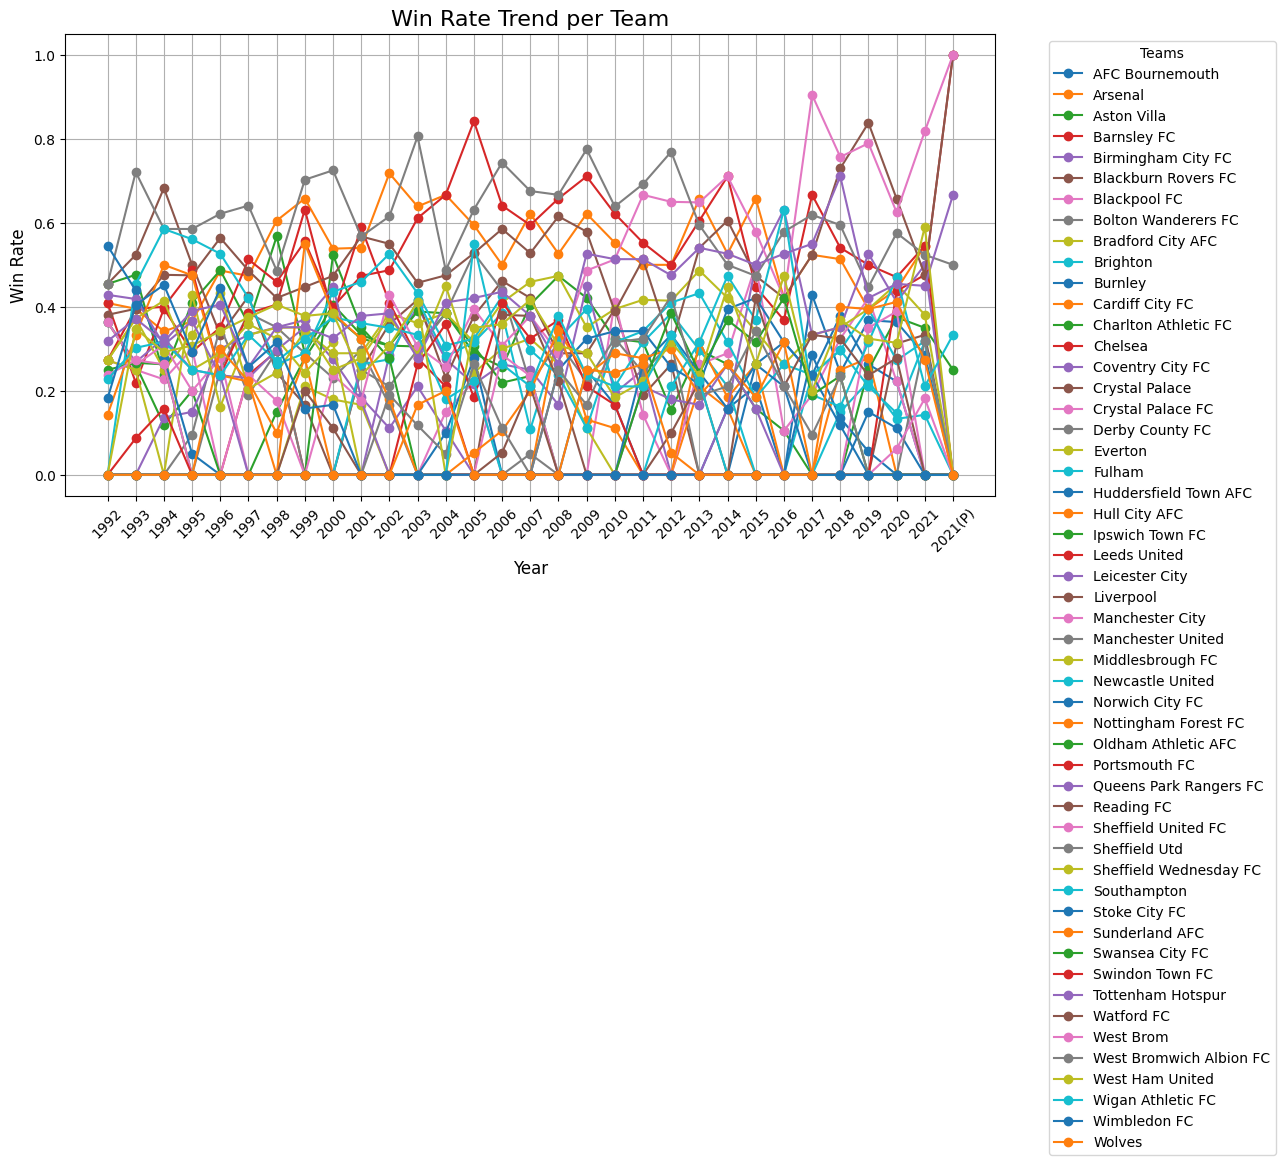

In [39]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 6))

# 各チームの勝率の折れ線グラフを描く
for team in win_rate_trend.columns:
    plt.plot(win_rate_trend.index, win_rate_trend[team], marker='o', label=team)

# グラフの設定
plt.title('Win Rate Trend per Team', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

# グラフを表示
plt.show()


<ipython-input-41-213fa3f8d45c>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


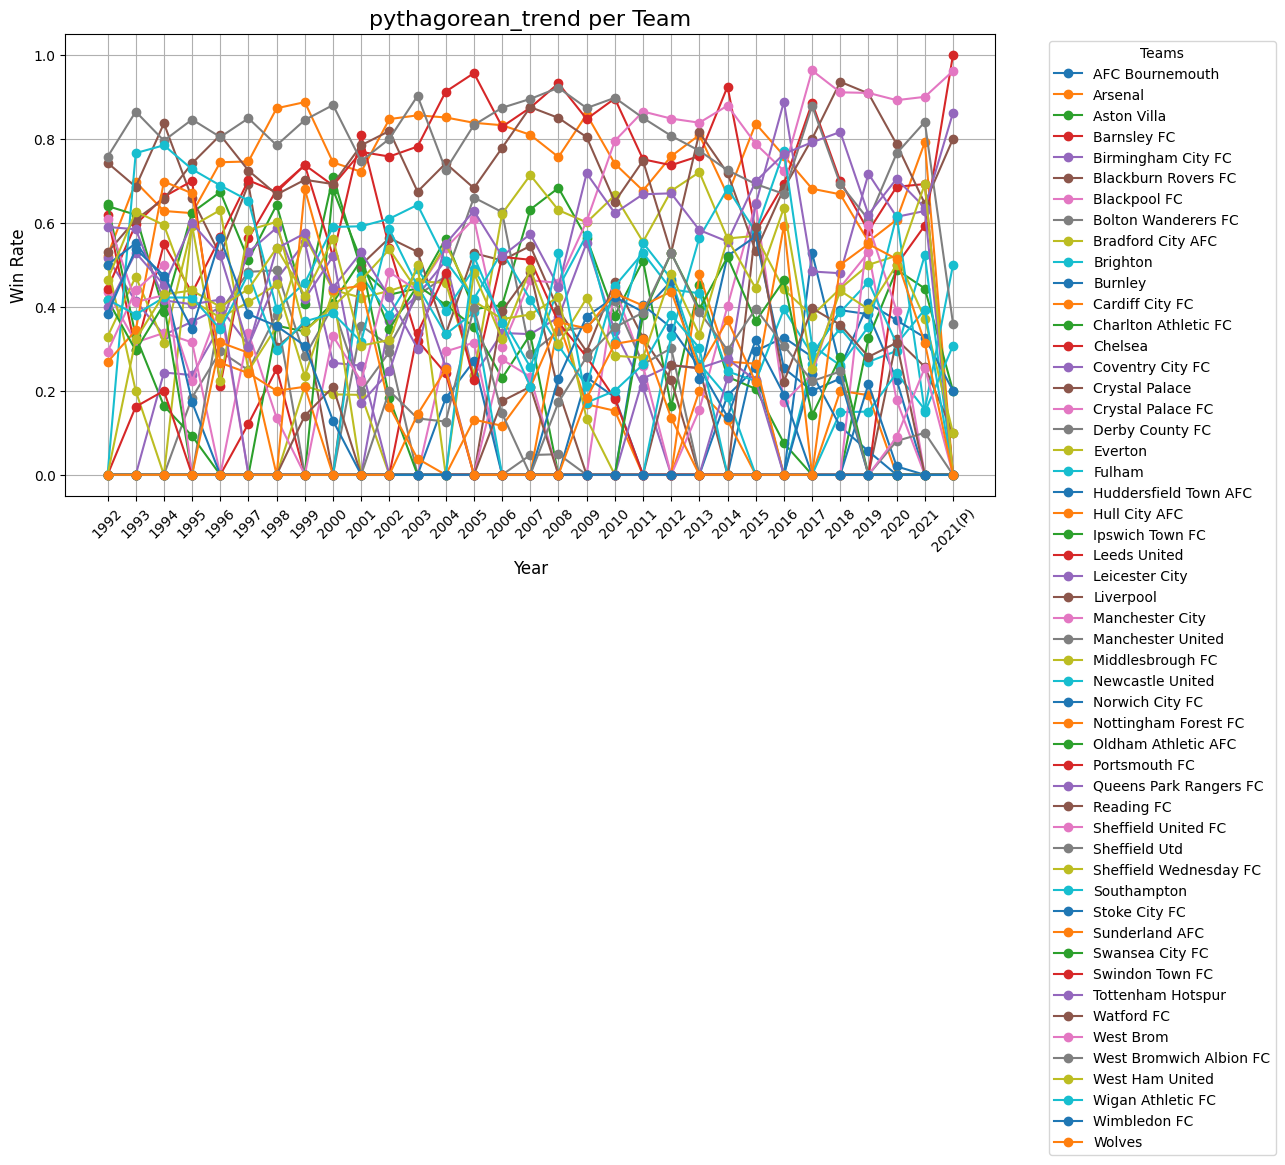

In [41]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 6))

# 各チームの勝率の折れ線グラフを描く
for team in pythagorean_trend.columns:
    plt.plot(pythagorean_trend.index, pythagorean_trend[team], marker='o', label=team)

# グラフの設定
plt.title('pythagorean_trend per Team', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

# グラフを表示
plt.show()


現在のプレミアリーグのチームだけなら観察可能??

In [42]:
currently_being_used = [
    "AFC Bournemouth",
    "Arsenal",
    "Aston Villa",
    "Brighton",
    "Burnley",
    "Chelsea",
    "Crystal Palace",
    "Everton",
    "Fulham",
    "Liverpool",
    "Manchester City",
    "Manchester United",
    "Newcastle United",
    "Nottingham Forest FC",
    "Tottenham Hotspur",
    "West Ham United",
    "Wolverhampton Wanderers (Wolves)"
]


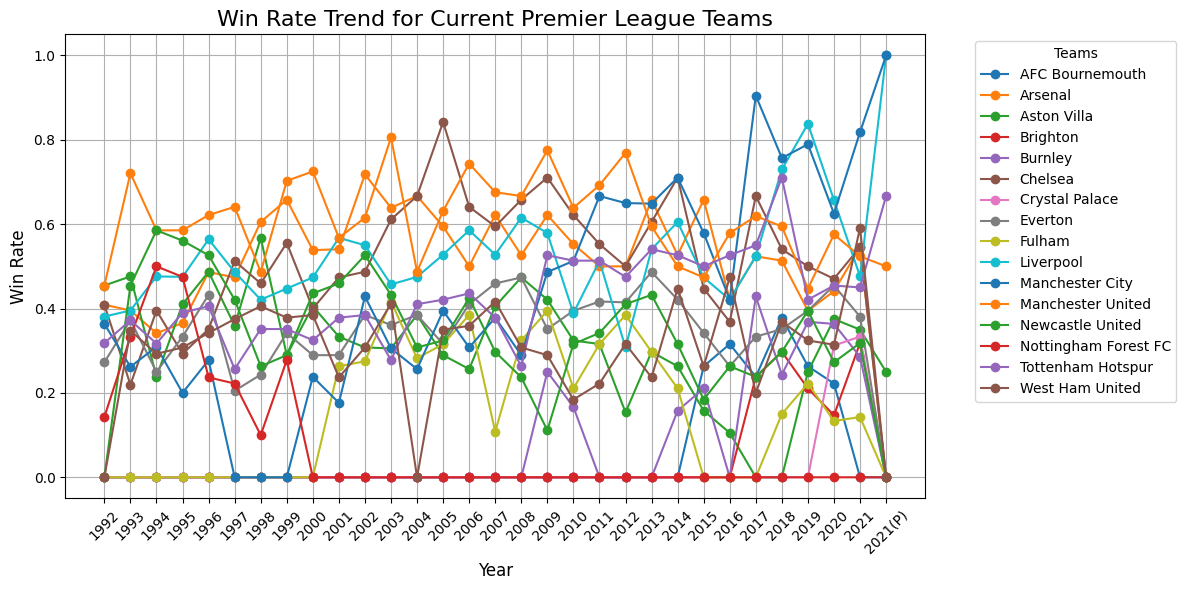

In [43]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 6))

# 現在のプレミアリーグチームの勝率だけを描画
for team in currently_being_used:
    if team in win_rate_trend.columns:  # チームが列に存在するか確認
        plt.plot(win_rate_trend.index, win_rate_trend[team], marker='o', label=team)

# グラフの設定
plt.title('Win Rate Trend for Current Premier League Teams', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

# グラフを表示
plt.show()

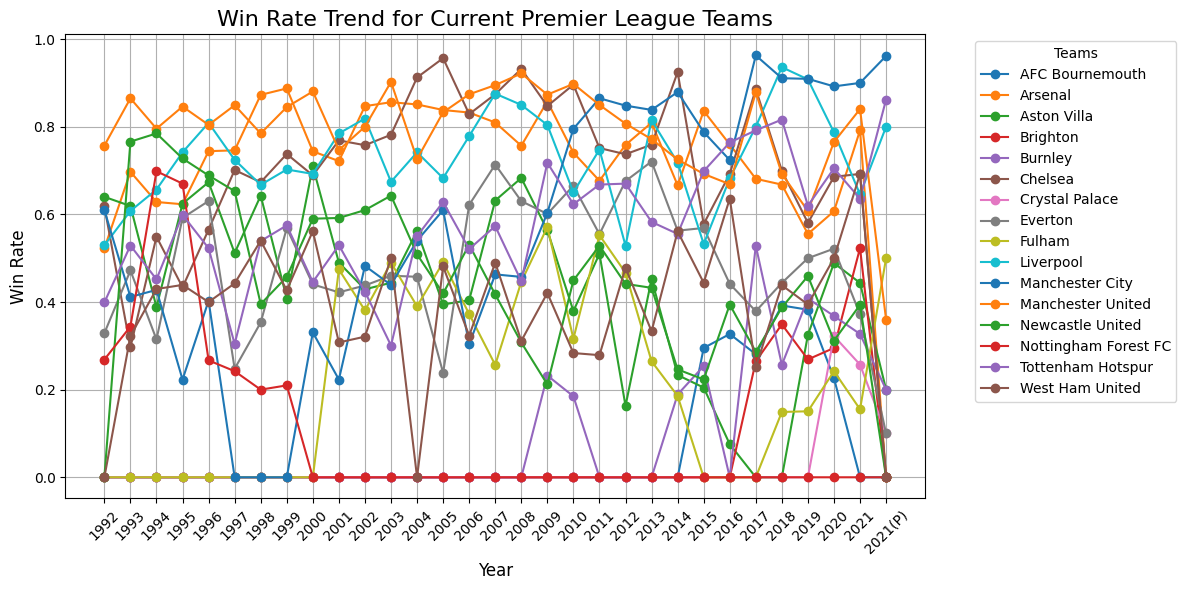

In [45]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 6))

# 現在のプレミアリーグチームのピタゴラス勝率だけを描画
for team in currently_being_used:
    if team in pythagorean_trend.columns:  # チームが列に存在するか確認
        plt.plot(pythagorean_trend.index, pythagorean_trend[team], marker='o', label=team)

# グラフの設定
plt.title('Win Rate Trend for Current Premier League Teams', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

# グラフを表示
plt.show()